In [35]:
import pandas as pd
import os 

In [36]:
path= os.getcwd().split('/')
i=path.index('Alignment-of-schema-only-and-instance-only-data')
folder_path= "/".join(path[:i+1])

llama=pd.read_csv(folder_path+"/Results_Experiments/llama_results/llama_with_time.csv")
gpt=pd.read_csv(folder_path+"/Results_Experiments/GPT_results/gpt_with_time.csv")

In [37]:
gpt.columns

Index(['Category', 'Relation', 'Dataset', 'models', 'f1_score', 'Precision',
       'Recall', 'Execution_Time', 'Model', 'Dataset Name', 'noise',
       'models_y', 'Relation Type', 'Relation_binaire',
       'Source 1 Attribute Count', 'Source 2 Attribute Count',
       'Common Attribute Count', 'pourcentage_commun', 'Precision Median',
       'Recall Median', 'F1 Score Median', 'ngcd_at_median',
       'Precision (Top n%)', 'Recall (Top n%)', 'F1 Score (Top n%)',
       'ngcd_at_n', 'Precision (Top 2n%)', 'Recall (Top 2n%)',
       'F1 Score (Top 2n%)', 'ngcd_at_2n', 'F1 Score (Top 25)', 'ngcd_at_25',
       'F1 Score (Top 20)', 'ngcd_at_20', 'F1 Score (Top 15)', 'ngcd_at_15',
       'F1 Score (Top 10)', 'ngcd_at_10', 'F1 Score (Top 7)', 'ngcd_at_7',
       'F1 Score (Top 5)', 'ngcd_at_5', 'Execution_Time_y'],
      dtype='object')

## GPT

In [38]:
gpt.groupby(["Model"])[['f1_score','ngcd_at_median']].agg(['mean', 'std']).round(2)

f1_score       ngcd_at_median      
                                           mean   std           mean   std
Model                                                                     
albert-base-v2                             0.52  0.29           0.66  0.30
bert-base-uncased                          0.54  0.29           0.70  0.29
distilbert-base-uncased                    0.54  0.28           0.71  0.27
facebook/bart-base                         0.52  0.29           0.70  0.29
gpt                                        0.58  0.26           0.84  0.18
roberta-base                               0.53  0.26           0.67  0.29
sentence-transformers/all-MiniLM-L6-v2     0.54  0.27           0.71  0.30

In [39]:
gpt.groupby(["Model", "Relation Type"])[['f1_score','ngcd_at_median']].agg(['mean', 'std']).round(2)

f1_score         
                                                                 mean   std   
Model                                  Relation Type                          
albert-base-v2                         Joinable                  0.44  0.28  \
                                       Semantically-Joinable     0.46  0.28   
                                       Unionable                 0.81  0.10   
                                       View-Unionable            0.40  0.26   
bert-base-uncased                      Joinable                  0.46  0.28   
                                       Semantically-Joinable     0.47  0.28   
                                       Unionable                 0.82  0.11   
                                       View-Unionable            0.46  0.26   
distilbert-base-uncased                Joinable                  0.48  0.27   
                                       Semantically-Joinable     0.47  0.26   
                                       Unionable                 0.82  0.12   
                                       View-Unionable            0.45  0.25   
facebook/bart-base                     Joinable                  0.46  0.30   
                                       Semantically-Joinable     0.46  0.28   
                                       Unionable                 0.79  0.10   
                                       View-Unionable            0.41  0.28   
gpt                                    Joinable                  0.51  0.25   
                                       Semantically-Joinable     0.50  0.25   
                                       Unionable                 0.83  0.11   
                                       View-Unionable            0.51  0.25   
roberta-base                           Joinable                  0.46  0.25   
                                       Semantically-Joinable     0.47  0.25   
                                       Unionable                 0.78  0.13   
                                       View-Unionable            0.45  0.22   
sentence-transformers/all-MiniLM-L6-v2 Joinable                  0.48  0.27   
                                       Semantically-Joinable     0.47  0.26   
                                       Unionable                 0.80  0.10   
                                       View-Unionable            0.47  0.25   

                                                             ngcd_at_median   
                                                                       mean   
Model                                  Relation Type                          
albert-base-v2                         Joinable                        0.62  \
                                       Semantically-Joinable           0.65   
                                       Unionable                       0.83   
                                       View-Unionable                  0.56   
bert-base-uncased                      Joinable                        0.66   
                                       Semantically-Joinable           0.68   
                                       Unionable                       0.84   
                                       View-Unionable                  0.66   
distilbert-base-uncased                Joinable                        0.67   
                                       Semantically-Joinable           0.69   
                                       Unionable                       0.87   
                                       View-Unionable                  0.65   
facebook/bart-base                     Joinable                        0.65   
                                       Semantically-Joinable           0.70   
                                       Unionable                       0.82   
                                       View-Unionable                  0.65   
gpt                                    Joinable                        0.82   
                               

/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3942/2906989107.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3942/2906989107.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45,fontsize=14)
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3942/2906989107.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3942/2906989107.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize=14)


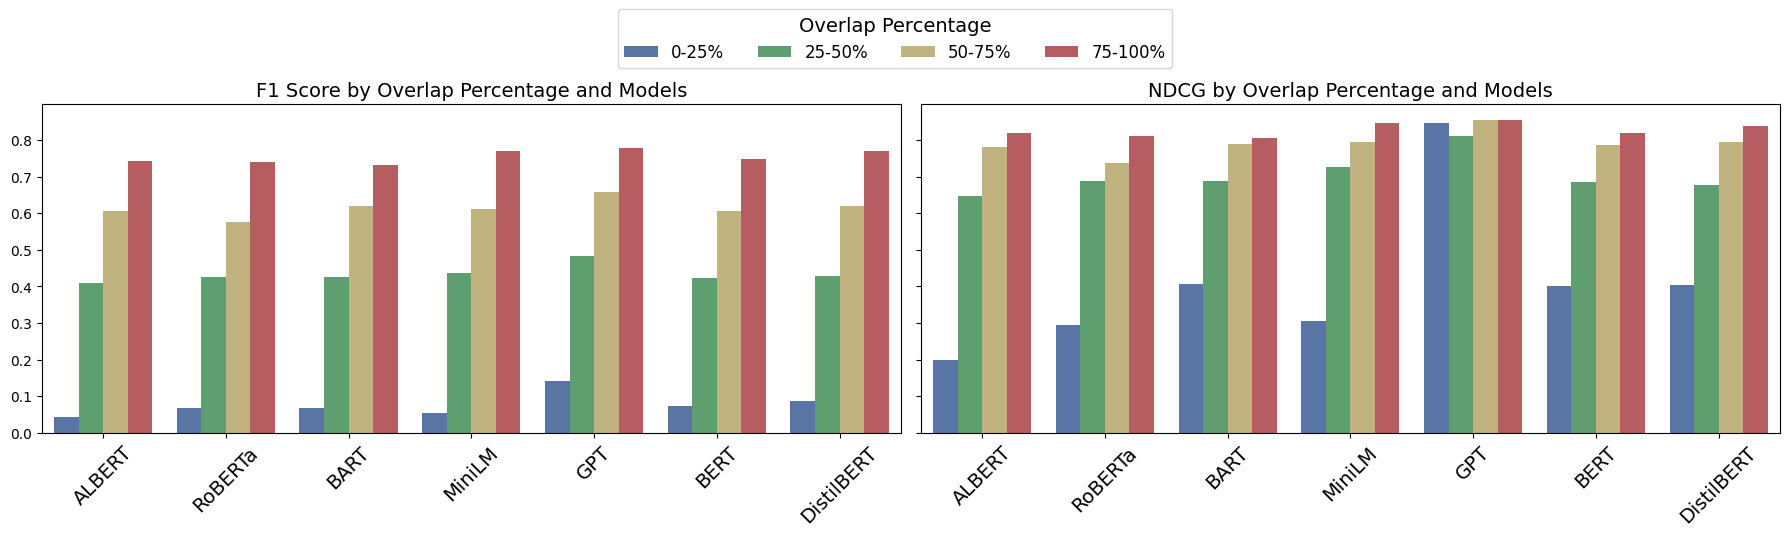

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
model_name_mapping = {
    "bert-base-uncased": "BERT",
    "distilbert-base-uncased": "DistilBERT",
    "sentence-transformers/all-MiniLM-L6-v2": "MiniLM",
    "albert-base-v2": "ALBERT",
    "facebook/bart-base": "BART",
    "gpt": "GPT",
    "roberta-base": "RoBERTa"
}


# Assuming the dataframe `dd` is already loaded and contains the necessary columns
dd = gpt.copy()
dd = dd.rename(columns={"NDCG at Median": "ngcd_at_median", "Model": "models"})
dd['models'] = dd['models'].replace(model_name_mapping)
md=dd['models'].iloc[:,0]
dd=dd.drop(columns=["models"])
dd['models']=md

# Define the required columns
required_columns = ['pourcentage_commun', 'F1 Score Median', 'models', 'Relation Type', "noise", "ngcd_at_median"]
data_perc = dd[required_columns].rename(columns={
    "Relation Type": "Relation_Type",
    "F1 Score Median": "F1_score",
    "ngcd_at_median": "NDCG"
}).sort_values(by="pourcentage_commun")

# Define percentage range bins and labels
bins = [0, 25, 50, 75, 100]
labels = ["0-25%", "25-50%", "50-75%", "75-100%"]
data_perc['pourcentage_commun_range'] = pd.cut(
    data_perc['pourcentage_commun'], bins=bins, labels=labels, include_lowest=True
)

# Group by percentage range and models, then calculate mean and std
metrics_with_variance = data_perc.groupby(['models', 'pourcentage_commun_range'], as_index=False).agg({
    'F1_score': ['mean', 'std'],
    'NDCG': ['mean', 'std']
}).sort_values(by="pourcentage_commun_range")

# Rename columns for clarity
metrics_with_variance.columns = ['models', 'pourcentage_commun_range', 'F1_mean', 'F1_std', 'NDCG_mean', 'NDCG_std']

# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

# Plot F1 Score mean
sns.barplot(
    data=metrics_with_variance,
    x='models',
    y='F1_mean',
    hue='pourcentage_commun_range',
    ax=axes[0],
    palette=[
        "#4C72B0",  # Soft Navy Blue
        "#55A868",  # Gentle Green
        '#CCB974',  # Soft Gold
        "#C44E52"   # Muted Red
    ],
    ci=None
)
axes[0].set_title("F1 Score by Overlap Percentage and Models",fontsize=14)
axes[0].set_ylabel("", fontsize=14)
axes[0].set_xlabel("", fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45,fontsize=14)
axes[0].get_legend().remove()  # Remove individual legend

# Plot NDCG mean
sns.barplot(
    data=metrics_with_variance,
    x='models',
    y='NDCG_mean',
    hue='pourcentage_commun_range',
    ax=axes[1],
    palette=[
        "#4C72B0",  # Soft Navy Blue
        "#55A868",  # Gentle Green
        '#CCB974',  # Soft Gold
        "#C44E52"   # Muted Red
    ],
    ci=None
)
axes[1].set_title("NDCG by Overlap Percentage and Models",fontsize=14)
axes[1].set_ylabel("", fontsize=14)
axes[1].set_xlabel("", fontsize=16)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize=14)
axes[1].get_legend().remove()  # Remove individual legend

# Add a single legend in the center
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels, title="Overlap Percentage",fontsize=12,title_fontsize=14,
    loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4,
)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend
plt.savefig("percentage_overlap_gpt.png")

plt.show()


## Llama

In [41]:
llama.groupby(["Model"])[['f1_score','NDCG at Median']].agg(['mean', 'std']).round(2)

f1_score       NDCG at Median      
                                           mean   std           mean   std
Model                                                                     
albert-base-v2                             0.48  0.25           0.51  0.29
bert-base-uncased                          0.47  0.25           0.64  0.29
distilbert-base-uncased                    0.46  0.26           0.64  0.27
facebook/bart-base                         0.42  0.23           0.54  0.30
gpt                                        0.50  0.25           0.79  0.24
roberta-base                               0.43  0.25           0.51  0.24
sentence-transformers/all-MiniLM-L6-v2     0.45  0.25           0.68  0.26

In [42]:
llama.groupby(["Model", "Relation"])[['f1_score','NDCG at Median']].agg(['mean', 'std']).round(2)



f1_score         
                                                                 mean   std   
Model                                  Relation                               
albert-base-v2                         Joinable                  0.41  0.23  \
                                       Semantically-Joinable     0.40  0.24   
                                       Unionable                 0.73  0.12   
                                       View-Unionable            0.44  0.21   
bert-base-uncased                      Joinable                  0.40  0.25   
                                       Semantically-Joinable     0.40  0.26   
                                       Unionable                 0.70  0.11   
                                       View-Unionable            0.42  0.22   
distilbert-base-uncased                Joinable                  0.39  0.24   
                                       Semantically-Joinable     0.40  0.26   
                                       Unionable                 0.71  0.12   
                                       View-Unionable            0.41  0.23   
facebook/bart-base                     Joinable                  0.35  0.23   
                                       Semantically-Joinable     0.37  0.24   
                                       Unionable                 0.62  0.09   
                                       View-Unionable            0.37  0.23   
gpt                                    Joinable                  0.42  0.24   
                                       Semantically-Joinable     0.42  0.24   
                                       Unionable                 0.74  0.13   
                                       View-Unionable            0.46  0.22   
roberta-base                           Joinable                  0.36  0.24   
                                       Semantically-Joinable     0.37  0.25   
                                       Unionable                 0.69  0.14   
                                       View-Unionable            0.37  0.22   
sentence-transformers/all-MiniLM-L6-v2 Joinable                  0.39  0.24   
                                       Semantically-Joinable     0.38  0.24   
                                       Unionable                 0.68  0.13   
                                       View-Unionable            0.38  0.23   

                                                             NDCG at Median   
                                                                       mean   
Model                                  Relation                               
albert-base-v2                         Joinable                        0.45  \
                                       Semantically-Joinable           0.47   
                                       Unionable                       0.71   
                                       View-Unionable                  0.45   
bert-base-uncased                      Joinable                        0.60   
                                       Semantically-Joinable           0.55   
                                       Unionable                       0.79   
                                       View-Unionable                  0.63   
distilbert-base-uncased                Joinable                        0.60   
                                       Semantically-Joinable           0.61   
                                       Unionable                       0.78   
                                       View-Unionable                  0.59   
facebook/bart-base                     Joinable                        0.51   
                                       Semantically-Joinable           0.51   
                                       Unionable                       0.73   
                                       View-Unionable                  0.46   
gpt                                    Joinable                        0.72   
                               

/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3942/1922339331.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3942/1922339331.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45,fontsize=14)
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3942/1922339331.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3942/1922339331.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize=14)


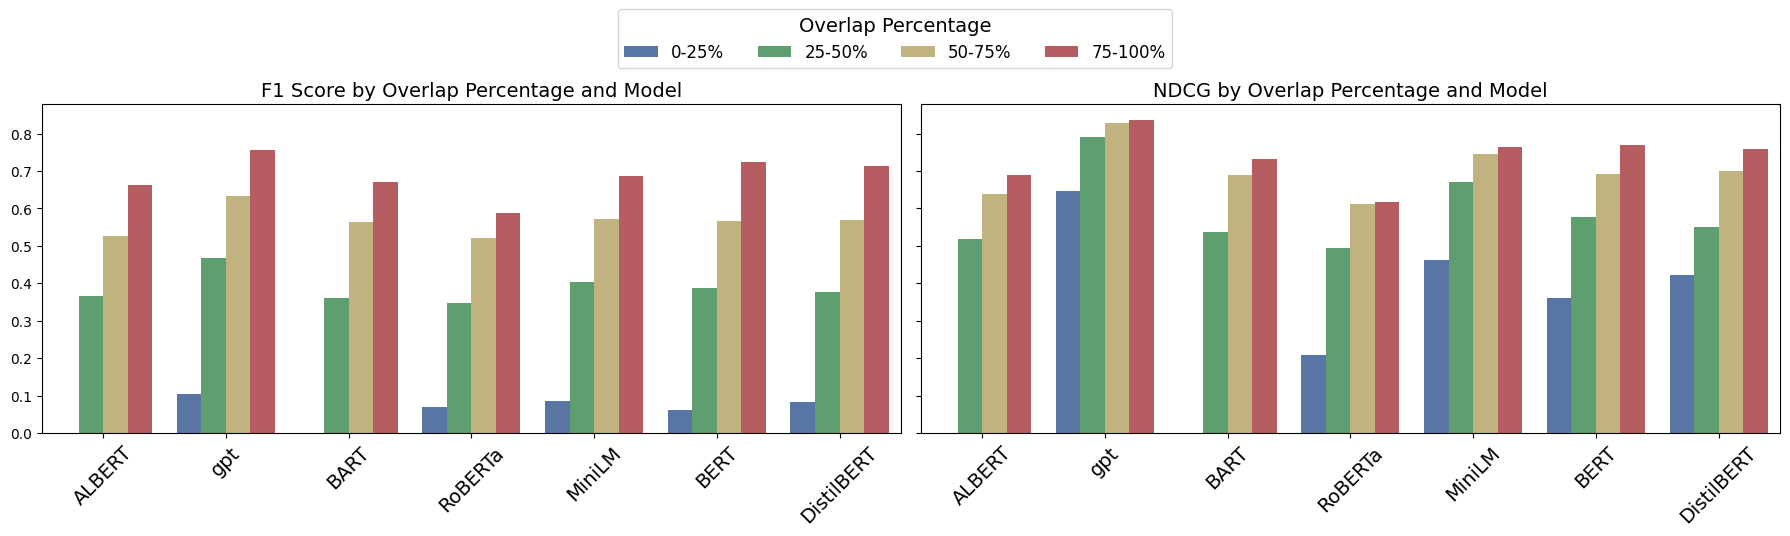

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
model_name_mapping = {
    "bert-base-uncased": "BERT",
    "distilbert-base-uncased": "DistilBERT",
    "sentence-transformers/all-MiniLM-L6-v2": "MiniLM",
    "albert-base-v2": "ALBERT",
    "facebook/bart-base": "BART",
    "llama": "llama",
    "roberta-base": "RoBERTa"
}


# Assuming the dataframe `dd` is already loaded and contains the necessary columns
dd = llama.copy()
dd = dd.rename(columns={"NDCG at Median": "ngcd_at_median", "Model": "Model"})
dd['Model'] = dd['Model'].replace(model_name_mapping)


# Define the required columns
required_columns = ['pourcentage_commun', 'F1 Score Median', 'Model', 'Relation', "Noise_Level.1", "ngcd_at_median"]
data_perc = dd[required_columns].rename(columns={
    "Relation Type": "Relation_Type",
    "F1 Score Median": "F1_score",
    "ngcd_at_median": "NDCG"
}).sort_values(by="pourcentage_commun")

# Define percentage range bins and labels
bins = [0, 25, 50, 75, 100]
labels = ["0-25%", "25-50%", "50-75%", "75-100%"]
data_perc['pourcentage_commun_range'] = pd.cut(
    data_perc['pourcentage_commun'], bins=bins, labels=labels, include_lowest=True
)

# Group by percentage range and Model, then calculate mean and std
metrics_with_variance = data_perc.groupby(['Model', 'pourcentage_commun_range'], as_index=False).agg({
    'F1_score': ['mean', 'std'],
    'NDCG': ['mean', 'std']
}).sort_values(by="pourcentage_commun_range")

# Rename columns for clarity
metrics_with_variance.columns = ['Model', 'pourcentage_commun_range', 'F1_mean', 'F1_std', 'NDCG_mean', 'NDCG_std']

# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

# Plot F1 Score mean
sns.barplot(
    data=metrics_with_variance,
    x='Model',
    y='F1_mean',
    hue='pourcentage_commun_range',
    ax=axes[0],
    palette=[
        "#4C72B0",  # Soft Navy Blue
        "#55A868",  # Gentle Green
        '#CCB974',  # Soft Gold
        "#C44E52"   # Muted Red
    ],
    ci=None
)
axes[0].set_title("F1 Score by Overlap Percentage and Model",fontsize=14)
axes[0].set_ylabel("", fontsize=14)
axes[0].set_xlabel("", fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45,fontsize=14)
axes[0].get_legend().remove()  # Remove individual legend

# Plot NDCG mean
sns.barplot(
    data=metrics_with_variance,
    x='Model',
    y='NDCG_mean',
    hue='pourcentage_commun_range',
    ax=axes[1],
    palette=[
        "#4C72B0",  # Soft Navy Blue
        "#55A868",  # Gentle Green
        '#CCB974',  # Soft Gold
        "#C44E52"   # Muted Red
    ],
    ci=None
)
axes[1].set_title("NDCG by Overlap Percentage and Model",fontsize=14)
axes[1].set_ylabel("", fontsize=14)
axes[1].set_xlabel("", fontsize=16)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize=14)
axes[1].get_legend().remove()  # Remove individual legend

# Add a single legend in the center
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels, title="Overlap Percentage",fontsize=12,title_fontsize=14,
    loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4,
)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend
plt.savefig("percentage_overlap_llama.png")
plt.show()
